<a href="https://colab.research.google.com/github/taekyungss/Naver_BoostCourse/blob/main/%E1%84%87%E1%85%AE%E1%84%89%E1%85%B3%E1%84%90%E1%85%B3%E1%84%8F%E1%85%A9%E1%84%89%E1%85%B3_1_5_K_beauty_%E1%84%80%E1%85%AA%E1%84%8C%E1%85%A6_%EA%B9%80%ED%83%9C%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
* 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* 미션을 위해 아래 코드를 실행해 주세요.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib


df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", encoding="cp949")
```

|    | 국가(대륙)별   | 상품군별           | 판매유형별   | 시점     |   데이터 |
|---:|:---------------|:-------------------|:-------------|:---------|---------:|
|  0 | 미국           | 컴퓨터 및 주변기기 | 면세점 이외  | 2017.1/4 |     1054 |
|  1 | 미국           | 컴퓨터 및 주변기기 | 면세점 이외  | 2017.2/4 |      946 |
|  2 | 미국           | 컴퓨터 및 주변기기 | 면세점 이외  | 2017.3/4 |      791 |
|  3 | 미국           | 컴퓨터 및 주변기기 | 면세점 이외  | 2017.4/4 |      854 |
|  4 | 미국           | 컴퓨터 및 주변기기 | 면세점 이외  | 2018.1/4 |     2033 |

In [69]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", encoding="cp949")
print(df.shape)
df.head()

(2772, 5)


,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [4]:
df.describe(include="object")

,국가(대륙)별,상품군별,판매유형별,시점
count,2772,2772,2772,2772
unique,9,14,1,22
top,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4
freq,308,198,2772,126


In [5]:
df["판매유형별"].value_counts()

면세점 이외    2772
Name: 판매유형별, dtype: int64

## TODO 1 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.
* 그리고 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.  
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!



|       |      백만 |       연도 |       분기 |
|:------|----------:|-----------:|-----------:|
| count |   2772    | 2772       | 2772       |
| mean  |   1613.12 | 2019.27    |    2.40909 |
| std   |   4273.43 |    1.60091 |    1.11453 |
| min   | -10003    | 2017       |    1       |
| 25%   |     41.75 | 2018       |    1       |
| 50%   |    291.5  | 2019       |    2       |
| 75%   |   1181    | 2021       |    3       |
| max   |  47689    | 2022       |    4       |

In [70]:
df["연도"] = df['시점'].map(lambda x: x.split(".")[0])
df["분기"] = df['시점'].map(lambda x: x.split(".")[1][0])
df

,국가(대륙)별,상품군별,판매유형별,시점,데이터,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3
2769,기타,기 타,면세점 이외,2021.4/4,1076,2021,4
2770,기타,기 타,면세점 이외,2022.1/4,2325,2022,1


In [71]:
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)

In [72]:
df = df.rename(columns={'데이터':'백만'}) 
df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


## TODO2 pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.
* 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
* pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!


* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

| 국가(대륙)별   |   2017 |   2018 |   2019 |   2020 |   2021 |   2022 |
|:---------------|-------:|-------:|-------:|-------:|-------:|-------:|
| 기타           |  41571 |  36141 |  40950 |  44438 |  57959 |  19501 |
| 대양주         |  18989 |  17520 |  13191 |  16255 |  16841 |   5044 |
| 미국           | 142292 | 156312 | 186617 | 255384 | 277579 | 103416 |
| 아세안(ASEAN)  |  66163 |  76450 |  82930 | 105360 |  94150 |  38072 |
| 유럽연합(EU)   |  31068 |  36826 |  39008 |  39865 |  32349 |   9019 |
| 일본           | 125442 | 178094 | 189330 | 220730 | 280029 | 131771 |
| 중국           | 167240 | 182068 | 210418 | 289446 | 194380 |  98572 |
| 중남미         |  10245 |  11669 |  12981 |  12563 |   8298 |   2629 |
| 중동           |   8030 |   8019 |   9325 |  11467 |   6164 |   1389 |


<img src="https://i.imgur.com/nwP3Gb9.png">

In [9]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [73]:
df_country = df.pivot_table(index="국가(대륙)별", columns='연도', values="백만",aggfunc='sum')
df_country

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


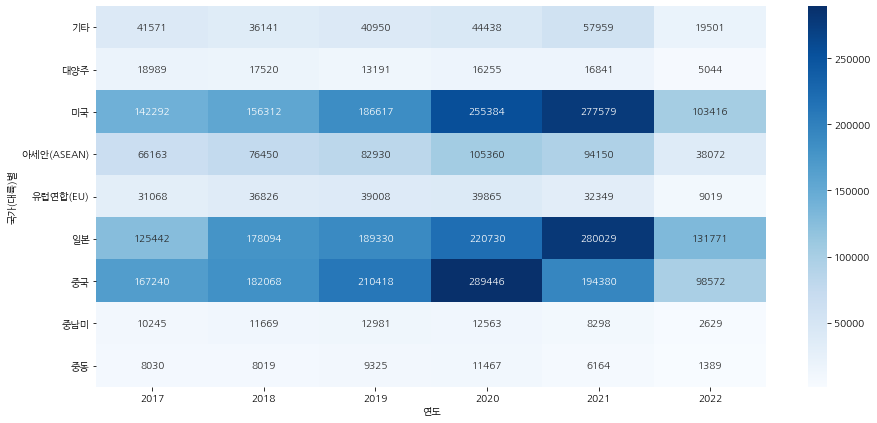

In [74]:
plt.figure(figsize=(15,7))
sns.heatmap(df_country, cmap="Blues", annot=True, fmt=".0f")

## TODO 3 groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

`2020년`은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다.
이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!

* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

<img src="https://i.imgur.com/JTbQf26.png">

In [12]:
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1


In [75]:
df_2020 = df[df["연도"]==2020]

In [22]:
a = df_2020.groupby(["상품군별",'국가(대륙)별'])["백만"].sum()
a = a.unstack()
a

국가(대륙)별,기타,대양주,미국,아세안(ASEAN),유럽연합(EU),일본,중국,중남미,중동
상품군별,,,,,,,,,
가전·전자·통신기기,1716,3825,10103,12405,3040,404,1353,912,839
기 타,3345,923,38731,2620,3907,30509,22736,625,533
농축수산물,9,1,33,17,0,2,88,0,0
사무·문구,187,21,398,3279,25,1526,403,3,4
생활용품 및 자동차용품,1464,1198,11467,6432,2560,3911,7142,1361,1060
서 적,4563,367,9709,4192,514,1055,6659,188,139
소프트웨어,21,20,865,3,99,27,4,15,17
스포츠·레저용품,755,690,5862,7423,1297,646,3999,183,196
아동·유아용품,1646,484,4934,2698,1354,1353,5606,151,121


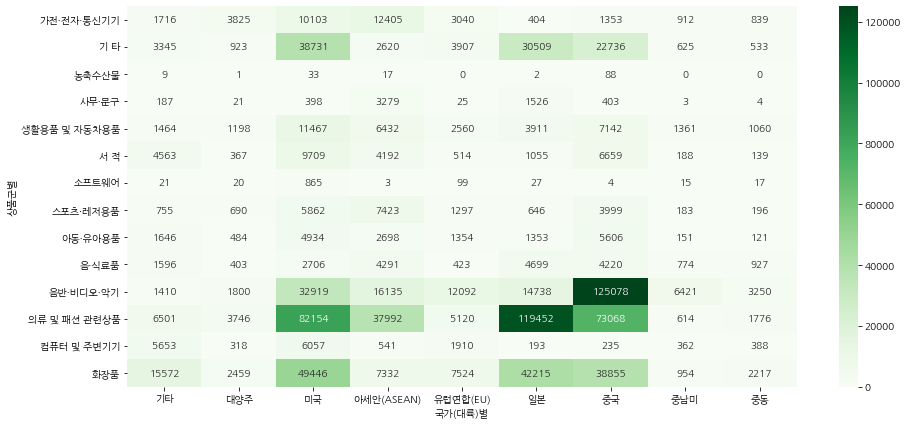

In [82]:
plt.figure(figsize=(15,7))
sns.heatmap(a, cmap="Greens", annot=True, fmt=".0f")

## TODO 4 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요! 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다!

* 답안 예시
<img src="https://i.imgur.com/04xLiBH.png">

In [78]:
dff = df[df["연도"]<= 2021]
dff

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054,2017,1
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946,2017,2
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791,2017,3
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854,2017,4
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033,2018,1
...,...,...,...,...,...,...,...
2765,기타,기 타,면세점 이외,2020.4/4,870,2020,4
2766,기타,기 타,면세점 이외,2021.1/4,870,2021,1
2767,기타,기 타,면세점 이외,2021.2/4,1278,2021,2
2768,기타,기 타,면세점 이외,2021.3/4,1154,2021,3


In [79]:
dff = dff[(dff['상품군별']=='의류 및 패션 관련상품')|(dff['상품군별']=='화장품')|(dff['상품군별']=='음반·비디오·악기')]
dff

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
2655,기타,화장품,면세점 이외,2020.4/4,1467,2020,4
2656,기타,화장품,면세점 이외,2021.1/4,1339,2021,1
2657,기타,화장품,면세점 이외,2021.2/4,1361,2021,2
2658,기타,화장품,면세점 이외,2021.3/4,1161,2021,3


In [80]:
dff = dff[(dff['국가(대륙)별']=='미국')|(dff['국가(대륙)별']=='중국')|(dff['국가(대륙)별']=='일본')]
dff

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
110,미국,음반·비디오·악기,면세점 이외,2017.1/4,1922,2017,1
111,미국,음반·비디오·악기,면세점 이외,2017.2/4,1778,2017,2
112,미국,음반·비디오·악기,면세점 이외,2017.3/4,2281,2017,3
113,미국,음반·비디오·악기,면세점 이외,2017.4/4,2647,2017,4
114,미국,음반·비디오·악기,면세점 이외,2018.1/4,2362,2018,1
...,...,...,...,...,...,...,...
807,일본,화장품,면세점 이외,2020.4/4,11994,2020,4
808,일본,화장품,면세점 이외,2021.1/4,12421,2021,1
809,일본,화장품,면세점 이외,2021.2/4,18768,2021,2
810,일본,화장품,면세점 이외,2021.3/4,23380,2021,3


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


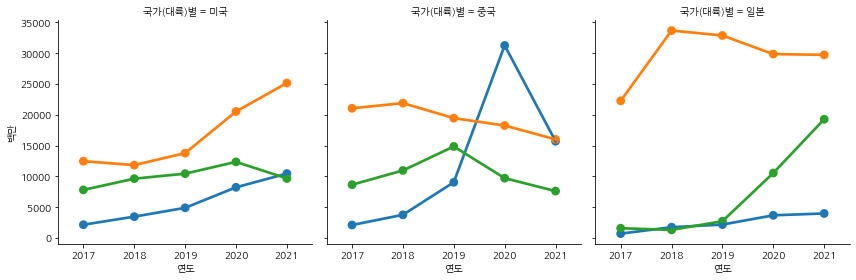

In [81]:
grid = sns.FacetGrid(data=dff, col='국가(대륙)별',hue='상품군별',size=4)
grid.map(sns.pointplot, "연도", "백만",ci=None)

## TODO 5 KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요! 
* 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
* KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요! 


* 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
* 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

<img src="https://i.imgur.com/ESrsQpU.png" width=300 align="left">
<img src="https://i.imgur.com/c8ds7xx.png" width=400>

In [146]:
df2 = pd.read_csv("https://raw.githubusercontent.com/taekyungss/Naver_BoostCourse/main/%EC%A0%84%EC%9E%90%EA%B8%88%EC%9C%B5%EC%82%AC%EA%B8%B0_%ED%94%BC%ED%95%B4_%EA%B2%BD%EB%A1%9C_20230124174841.csv", encoding="cp949")

In [158]:
df2 = df2.set_index(keys='피해경로별')
df2

,남자,여자,12~19세,20대,30대,40대,50대,60대,고등학생,대학(원)생,...,서비스직,판매직,기능직,기타,(학생),(주부),200~300만원 미만,300~400만원 미만,400~500만원 미만,500만원 이상
피해경로별,,,,,,,,,,,,,,,,,,,,,
이벤트를 가장한 홈페이지 접속,12.6,37.2,0,21.3,58.0,24.9,16.0,0,0,9.3,...,0.0,30.2,50,10.3,7.7,100,50,31.4,28.8,15.8
메일이나 게시판에 연결된 웹사이트 접속,3.9,35.9,0,7.8,0.0,60.3,0.0,0,0,11.7,...,100.0,0.0,0,0.0,9.7,0,0,0.0,9.9,26.9
공공·금융기관을 사칭한 전화를 통한 피싱,37.1,17.0,0,26.4,0.0,21.4,35.9,100,0,18.4,...,55.1,55.1,0,48.7,15.1,0,50,27.5,17.9,32.1
SNS를 통한 피싱,19.2,0.0,0,16.5,30.1,0.0,16.0,0,0,0.0,...,0.0,0.0,0,10.3,0.0,0,0,11.1,0.0,16.7
"인스턴트메신저(카카오톡, 라인, 페이스북 메시지 등) 채팅 도중 프로그램 또는 앱 설치",27.4,19.0,46,12.9,12.0,24.9,51.9,21,0,37.7,...,44.9,34.7,0,43.4,31.0,0,0,21.3,24.0,26.3
금융기관 홈페이지를 가장한 웹사이트 접속,3.2,0.0,0,0.0,0.0,7.4,0.0,0,0,0.0,...,0.0,0.0,50,0.0,0.0,0,0,10.7,0.0,0.0
인스턴트메신저 채팅 또는 문자메시지 내 인터넷주소(URL) 클릭,11.1,14.1,54,15.1,0.0,14.8,0.0,0,100,22.8,...,0.0,0.0,50,9.9,36.4,0,0,19.4,19.5,8.0


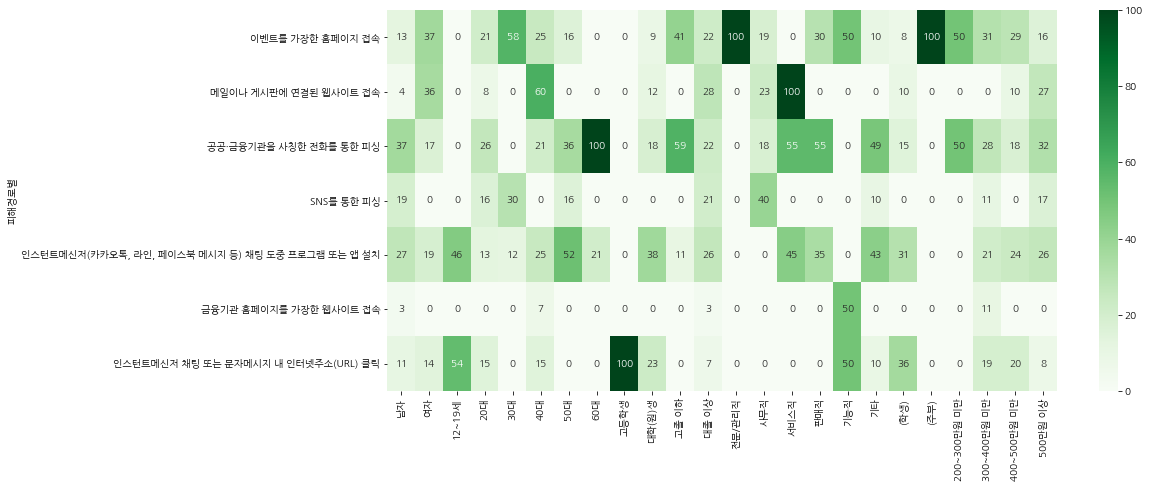

In [159]:
plt.figure(figsize=(15,7))
sns.heatmap(df2, cmap="Greens", annot=True, fmt=".0f")